## OpenAI Gym的数据预处理

在使用Gym进行强化学习的训练时，如果使用的是比较复杂的环境，且采用的是图像数据作为环境的观测值。但是这个观测值在DQN的论文中并没有直接去使用，而是进行了数据预处理，让每四张图片生成一个（84,84,4）的tensor。实现这个过程用到了cv2模块，使用这个模块需要安装opencv-python库。

实现的步骤如下：   
    1. resize：四个图片，每个图片的shape为（210,160,3），resize为（84,84,3）         
    2. 灰化：将图像由（84,84,3）化为（84,84,1）      
    3. 归一化：数据类型从[0, 255]的unit8，变为[0.0, 1.0]的float32      
    4. concat:：将四个图片连接为一个（84,84,4）的tensor。      

In [1]:
import cv2
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imgbuffer_process(imgbuffer,out_shape=(84,84)):
    img_list = []
    for img in imgbuffer:
        #将图片reshape为（84,84,3）
        tmp = cv2.resize(src=img, dsize=out_shape)
        #将图像化为（84,84,1）的灰度图
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        #数据归一化
        tmp = cv2.normalize(tmp,tmp,alpha=0.0,beta=1.0,
                           norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
        #扩充一个维度
        tmp = np.expand_dims(tmp,len(tmp.shape))
        img_list.append(tmp)
    ret = np.concatenate(tuple(img_list), axis=2)
    return ret


In [3]:
env = gym.make('Breakout-v0')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.seed(1)

[1, 289714752]

In [6]:
N_F = env.observation_space.shape[0]
N_F

210

In [7]:
N_A = env.action_space.n
N_A

4

In [8]:
img_buffer = []
img_buffer_size = 4

In [9]:
s = env.reset()

img_input_shape = (84, 84, 4)


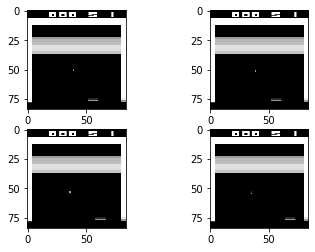

img_input_shape = (84, 84, 4)


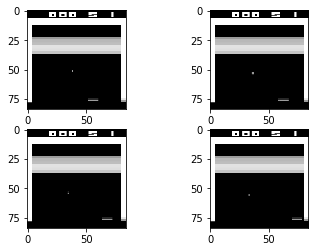

img_input_shape = (84, 84, 4)


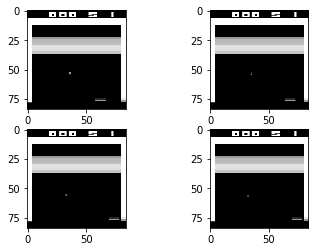

img_input_shape = (84, 84, 4)


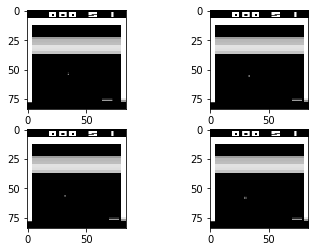

In [11]:
max_loop = 4
for i in range(max_loop):
    a = np.random.randint(0,N_A-1)
    s_, r, done, info = env.step(a)
    #env.render()
    
    if len(img_buffer) < img_buffer_size:
        img_buffer.append(s_)
        continue
    else:
        img_buffer.pop(0)
        img_buffer.append(s_)
    
    img_input = imgbuffer_process(img_buffer)
    print('img_input_shape = '+ str(img_input.shape))
    
    plt.subplot(2,2,1)
    plt.imshow(np.uint8(img_input[:,:,0] * 255), cmap='gray')
    plt.subplot(2,2,2)
    plt.imshow(np.uint8(img_input[:,:,1] * 255), cmap='gray')
    plt.subplot(2,2,3)
    plt.imshow(np.uint8(img_input[:,:,2] * 255), cmap='gray')
    plt.subplot(2,2,4)
    plt.imshow(np.uint8(img_input[:,:,3] * 255), cmap='gray')
    
    plt.show()